# Data Modeling

In [1]:
# standard imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import category_encoders as ce


# modeling libraries
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, f1_score, balanced_accuracy_score, RocCurveDisplay, precision_score, recall_score, accuracy_score, ConfusionMatrixDisplay, roc_auc_score, confusion_matrix


# quality of life
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [2]:
# reading in the dataframe
df = pd.read_csv('./data/ship_clean.csv', parse_dates=['order_date', 'shipping_date'])

In [3]:
# creating a short zip in order to reduce number of OHE columns
df['short_zip'] = df['customer_zipcode'].astype(str).str[:2]

In [4]:
df.head(3)

,type,actual_ship_days,estimated_ship_days,delivery_status,late_delivery_risk,category_id,category_name,customer_city,customer_id,customer_segment,customer_state,customer_zipcode,department_name,latitude,longitude,market,order_city,order_country,order_date,order_id,order_item_discount_rate,order_item_profit_ratio,order_item_quantity,order_region,order_state,order_status,product_card_id,product_name,product_price,shipping_date,shipping_mode,ship_performance,ontime,is_fraud,order_hour,order_before_noon,short_zip
0,DEBIT,3,4,Advance shipping,0,73,Sporting Goods,Caguas,20755,Consumer,PR,725.0,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,2018-01-31 22:56:00,77202,0.04,0.29,1,Southeast Asia,Java Occidental,COMPLETE,1360,Smart watch,327.75,2018-02-03 22:56:00,Standard Class,-1,1,0,22,0,72
1,TRANSFER,5,4,Late delivery,1,73,Sporting Goods,Caguas,19492,Consumer,PR,725.0,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,2018-01-13 12:27:00,75939,0.05,-0.80,1,South Asia,Rajastán,PENDING,1360,Smart watch,327.75,2018-01-18 12:27:00,Standard Class,1,0,0,12,0,72
2,CASH,4,4,Shipping on time,0,73,Sporting Goods,San Jose,19491,Consumer,CA,95125.0,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,2018-01-13 12:06:00,75938,0.06,-0.80,1,South Asia,Rajastán,CLOSED,1360,Smart watch,327.75,2018-01-17 12:06:00,Standard Class,0,1,0,12,0,95


# Shipping Performance

### Preparing X, y

In [5]:
X = df[['type', 'estimated_ship_days', 'product_price', 'order_item_quantity', 
        'short_zip', 'customer_segment', 'market', 'order_before_noon']]
X_encoded = pd.get_dummies(X)

In [6]:
y = df['ontime']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded,y, random_state = 48)

In [8]:
ohe = ce.OneHotEncoder()
X_train = ohe.fit_transform(X_train)
X_test = ohe.transform(X_test)

In [56]:
ss = StandardScaler()

NameError: name 'StandardScaler' is not defined

### Logistic Regression

In [9]:
logreg = LogisticRegression(n_jobs=-1,max_iter=10_000)

In [10]:
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=10000, n_jobs=-1)

In [11]:
logreg.score(X_test, y_test)

0.6934633281630844

In [12]:
df['ontime'].value_counts(normalize=True)

0    0.572793
1    0.427207
Name: ontime, dtype: float64

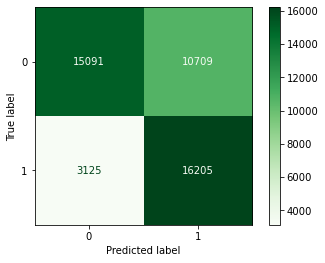

In [13]:
ConfusionMatrixDisplay.from_estimator(logreg, X_test, y_test, cmap = 'Greens');

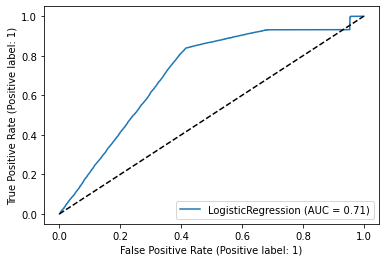

In [14]:
RocCurveDisplay.from_estimator(logreg, X_test, y_test);
plt.plot([0,1], [0,1], 'k--');

In [19]:
coefs = logreg.coef_
names = X_train.columns
pd.DataFrame(coefs, columns = names).T.sort_values(by=0, ascending=False)

,0
estimated_ship_days,0.685631
order_before_noon,0.282562
short_zip_80,0.236931
short_zip_18,0.172411
short_zip_74,0.171889
short_zip_85,0.132584
short_zip_46,0.123695
short_zip_63,0.120289
short_zip_22,0.118749
short_zip_65,0.108145
